In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("churn")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
corrind = df.corr().index

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

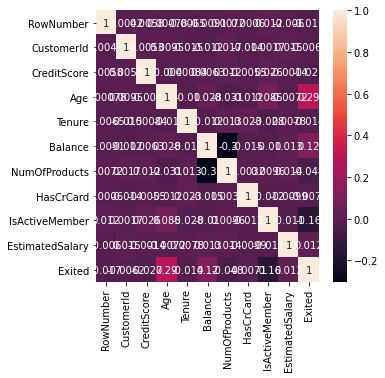

In [7]:
plt.figure(figsize = (5,5))
sns.heatmap(df[corrind].corr(), annot = True)

In [8]:
x= df.iloc[:,3:13]

In [9]:
y = df.iloc[:,13]

In [10]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
Geography = pd.get_dummies(x["Geography"], drop_first=True)

In [12]:
Gender = pd.get_dummies(x["Gender"], drop_first=True)

In [13]:
x =pd.concat([x,Geography,Gender], axis = "columns")

In [14]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [15]:
x.drop(["Geography","Gender"], axis = 1, inplace = True)

In [16]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
classifier = RandomForestClassifier()

In [21]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
classifier.score(x_test,y_test)

0.857

In [23]:
prediction = classifier.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
acc = accuracy_score(prediction,y_test)

In [26]:
acc

0.857

In [27]:
confusion_matrix(prediction,y_test)

array([[2299,  348],
       [  81,  272]], dtype=int64)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cross = cross_val_score(classifier,x,y,cv = 10)

In [35]:
cross

array([0.866, 0.856, 0.878, 0.866, 0.864, 0.849, 0.862, 0.865, 0.866,
       0.865])

In [36]:
cross.mean()

0.8637

In [37]:
df.shape

(10000, 14)

In [38]:
1000/10

100.0

In [39]:
100/5

20.0

In [40]:
from sklearn.model_selection import StratifiedKFold

In [66]:
accuracy = []
score = StratifiedKFold(n_splits=10)
score.get_n_splits(x,y)
for train_index,test_index in score.split(x,y):
    
    x1_train,x1_test = x.iloc[train_index], x.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index], y.iloc[test_index]
    
classifier.fit(x1_train,y1_train)
score = classifier.score

accuracy.append(score)
print(accuracy)

[<bound method ClassifierMixin.score of RandomForestClassifier()>]


In [77]:

accuracy=[]

skf = StratifiedKFold(n_splits=10, random_state=None)
skf.get_n_splits(x, y)
# X is the feature set and y is the target
for train_index, test_index in skf.split(x,y):  
    x1_train, X1_test = x.iloc[train_index], x.iloc[test_index] 
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    
    classifier.fit(x1_train,y1_train)
    prediction=classifier.predict(x1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)
print(accuracy)


accuracy = []
fold = StratifiedKFold(n_splits = 10)
fold.get_n_splits(x,y)
for train_index,test_index in fold.split(x,y):
    x1_train,x1_test = x.iloc[train_index],x.iloc[test_index]
    y1_train,y1_test = y.iloc[train_index],y.iloc[test_index]
    model.fit(x1_train,y1_train)
    score = model.score(y1_test,x1_test)
    accuracy.append(score)

print(accuracy)

[0.871, 0.664, 0.682, 0.676, 0.688, 0.682, 0.668, 0.693, 0.679, 0.677]


In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
model = RandomForestClassifier()

In [82]:
from sklearn.model_selection import StratifiedKFold
accuracy = []
fold = StratifiedKFold(n_splits = 10)
for train_index,test_index in fold.split(x,y):
    x2_train,x2_test = x.iloc[train_index],x.iloc[test_index]
    y2_train,y2_test = y.iloc[train_index],y.iloc[test_index]
    model.fit(x2_train,y2_train)
    score = model.score(x2_test,y2_test)
    accuracy.append(score)

print(accuracy)

[0.868, 0.849, 0.875, 0.865, 0.862, 0.85, 0.859, 0.873, 0.859, 0.863]


In [80]:
import numpy as np

In [81]:
np.array(accuracy).mean()

0.8613